In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta


In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
first_row = session.query(func.max(Measurement.date)).all()
max_date = first_row[0][0]

max_date = datetime.strptime(max_date, '%Y-%m-%d').date()
max_date

datetime.date(2017, 8, 23)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
cutoff_date = max_date - timedelta(days=365)
cutoff_date

# Perform a query to retrieve the data and precipitation scores
last_twelve = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=cutoff_date).all()
last_twelve

# Save the query results as a Pandas DataFrame and set the index to the date column
date_list = []
prcp_list = []

for item in last_twelve:
    if item[1]:
        date_list.append(item[0])
        prcp_list.append(item[1])

temp_dict = {"Date": date_list, "Prcp": prcp_list}

last_twelve_df = pd.DataFrame(temp_dict)
last_twelve_df_indexed = last_twelve_df.set_index('Date')
last_twelve_df_indexed


,Prcp
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-28,0.01
2016-08-31,0.13
2016-09-04,0.03
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


In [12]:
# Sort the dataframe by date
last_twelve_df_indexed_sorted = last_twelve_df_indexed.sort_values(['Date'])
last_twelve_df_indexed_sorted


,Prcp
Date,
2016-08-23,1.79
2016-08-23,0.70
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-21,0.02
2017-08-21,0.56
2017-08-22,0.50


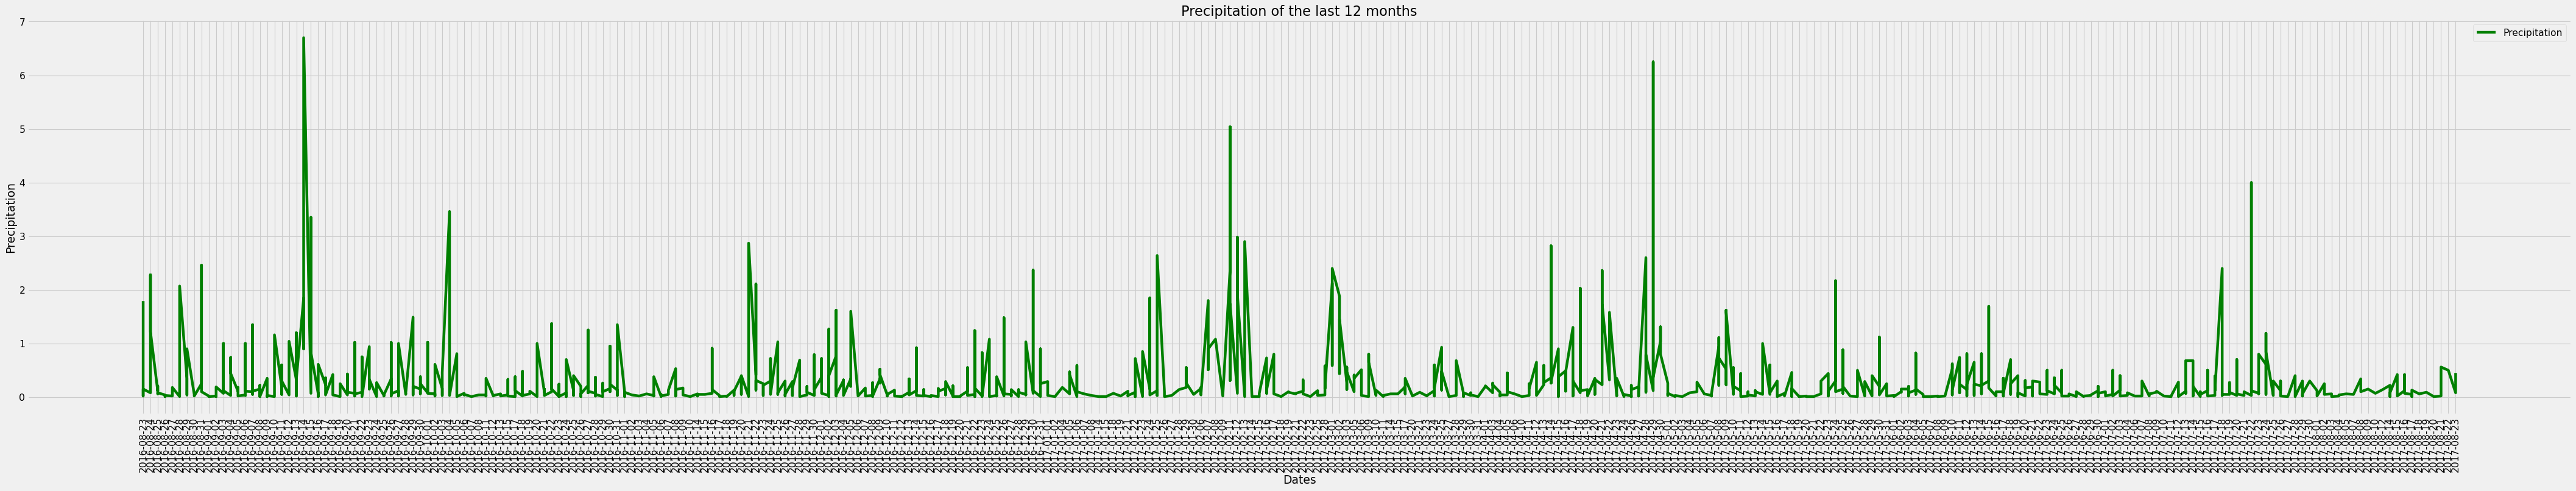

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp =  last_twelve_df_indexed_sorted["Prcp"]
plt.figure(figsize=(60, 10), dpi=80)
plt.plot(prcp, color="green", label="Precipitation")

plt.legend(loc="best")
plt.title("Precipitation of the last 12 months")
plt.xticks(rotation = 90)
plt.xlabel("Dates")
plt.ylabel("Precipitation")
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_twelve_df_indexed_sorted.describe()

,Prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).count()
station_count


9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stationcounts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

station_counts_df = pd.DataFrame(stationcounts, columns=['stations', 'station_counts'])
station_counts_df = station_counts_df.sort_values(by='station_counts', ascending=False)
station_counts_df


,stations,station_counts
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
    ## get the station w most IDs
    ## from there filter down w min,max, etc

# session.query(stationcounts.count, func.max)

max = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').first()
min = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').first()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').first()
print(max, min, avg)


(85.0,) (54.0,) (71.66378066378067,)


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_last_twelve = session.query(Measurement.tobs).filter(Measurement.date>=cutoff_date).filter(Measurement.station=='USC00519281').all()
tobs = pd.DataFrame(most_active_last_twelve, columns=['tobs'])
tobs

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 0, 'Temperature')

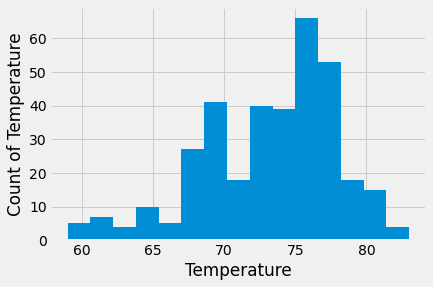

In [19]:

plt.hist(tobs, bins=15)
plt.ylabel('Count of Temperature')
plt.xlabel('Temperature')

# Close session

In [20]:
# Close Session
session.close()